## Importing Relavant Libraries

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Dataset

In [35]:
df =  pd.read_csv('prices.csv', header=0)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [36]:
df.drop("date", axis=1, inplace=True)

In [37]:
df.shape

(851264, 6)

In [38]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 39.0+ MB


# Data Exploration

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


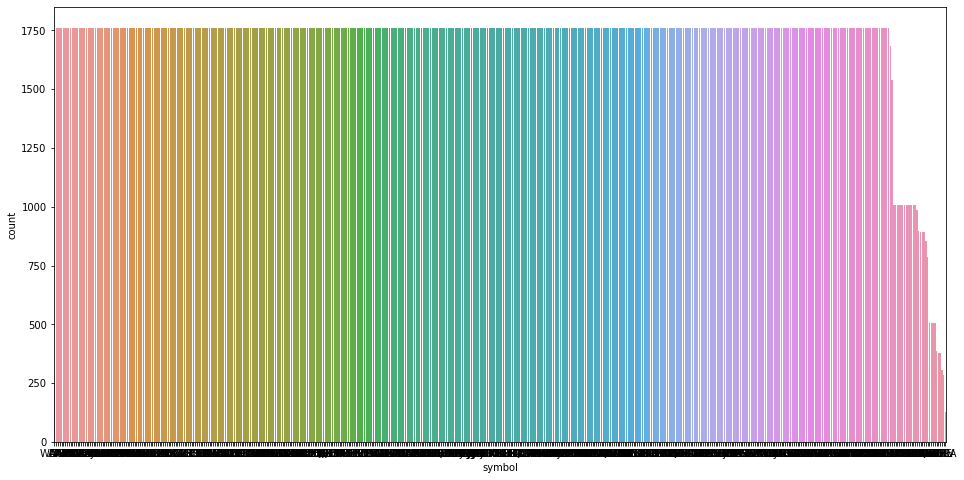

In [40]:
plt.figure(figsize=(16, 8))
sns.countplot(df.symbol)
plt.show()

#### Taking Stock name and date from user to extract data from main dataset

In [41]:
stock_name = input("Enter Stock Name : ")

Enter Stock Name :  YHOO


In [42]:
df1 = pd.DataFrame(df[(df['symbol']==stock_name)])
df1.head()

,symbol,open,close,low,high,volume
713,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1.symbol = encoder.fit_transform(df1.symbol)
df1.head()

,symbol,open,close,low,high,volume
713,0,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,0,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,0,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,0,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,0,16.680000,16.700001,16.620001,16.760000,15470000.0


In [44]:
# Spliting data into dependent and independent
x = df1.drop("volume", axis=1)
y = df1.volume

In [45]:
# Spliting data into train, test
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
# Preparing Models
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models = {
    "LinearSVR": LinearSVR(),
    "LinearRegression": LinearRegression(),
    "RandomForestRegression": RandomForestRegressor()
}

for name, model in models.items():
    # Training Model
    model.fit(x_train, y_train)
    # Displaying Accuracy
    print(name, "Accuracy", model.score(x_train, y_train))
    print("--"*50)

LinearSVR Accuracy -1.4022783369522882
----------------------------------------------------------------------------------------------------
LinearRegression Accuracy 0.3399789482020148
----------------------------------------------------------------------------------------------------
RandomForestRegression Accuracy 0.9017652198568581
----------------------------------------------------------------------------------------------------


Random Forest is performing much better than any other model.